# 不同的方式建立**<font color="red">Keras models</font>**

## Kera model有分為兩種: **<font color="red">Sequential model、Functional API model</font>**

## **<font color="red">Sequential model: 一層層按照順序執行model，只有在第一層(Layer)需要寫入input的type，第一層之後的input為上一層的output，下面為Sequential model的架構圖</font>**

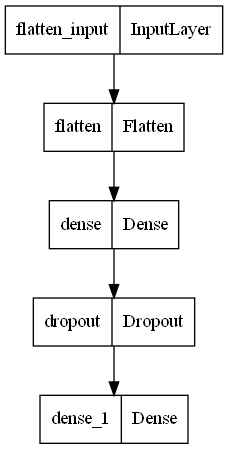

In [1]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
tf.keras.utils.plot_model(model, to_file='model.png')

## **<font color="red">Functional API model: 可以很多層(Layers)都能寫入input或輸出很多個output層，適合製作複雜的model，下面為較為複雜的Functional API model</font>**

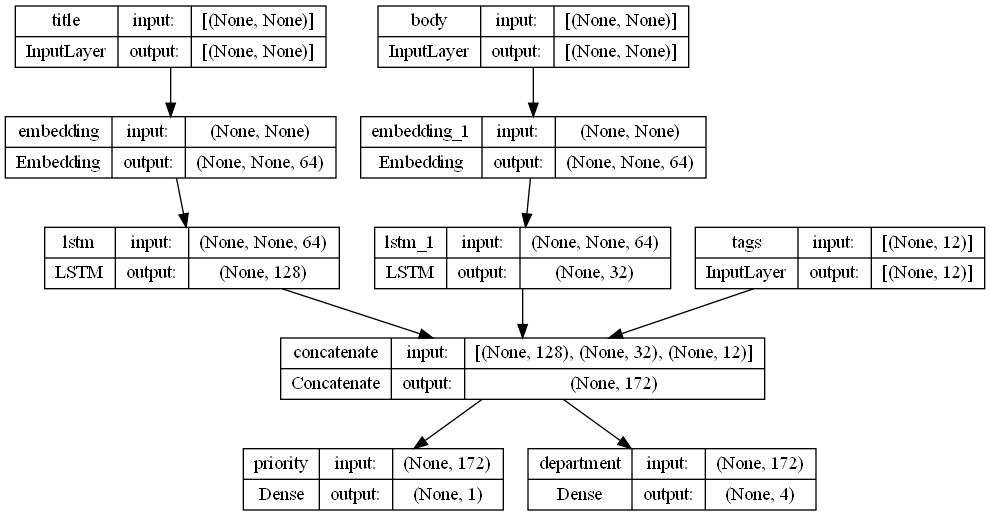

In [2]:
from tensorflow.keras import layers
import keras

num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

# show_shapes=True：Layer 含 Input/Output 資訊
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


# **<font color="red">The Sequential class</font>**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### **<font color="blue">漸進式的製作sequential model</font>**

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

### **<font color="blue">Calling a model for the first time to build it</font>**

In [5]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.21268171, -0.12290607, -0.12845391,  0.14704984, -0.15458684,
         -0.04227391,  0.22135323,  0.08204427, -0.08325809,  0.05927831,
         -0.13443205, -0.20586587,  0.03869557, -0.2022567 , -0.20911774,
         -0.15432341, -0.0133636 , -0.25087276,  0.06959906, -0.23493867,
          0.17950556,  0.2904641 , -0.14925897, -0.25550658,  0.10956854,
          0.09824091,  0.00395608,  0.20254475,  0.00924778, -0.0476889 ,
          0.23871475,  0.19590107,  0.16691074, -0.05795202, -0.00456738,
         -0.05360974, -0.12692109, -0.18955578, -0.04634443,  0.17566124,
          0.22989619,  0.06892198, -0.22025871,  0.21133608,  0.02110499,
          0.16416144, -0.15803035, -0.09575917,  0.26873004, -0.03569254,
         -0.07775657,  0.26587027,  0.21735072,  0.07542929, -0.2755855 ,
          0.1524111 ,  0.24128711, -0.12017946,  0.14414462,  0.28816485,
          0.064266  , -0.08189721, -0.10956

### **<font color="blue">The summary method</font>**

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### **<font color="blue">Naming models and layers with the `name` argument</font>**

In [7]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 這裡用來定義first layer的parameter。

### **<font color="blue">Specifying the input shape of your model in advance</font>**

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# **<font color="red">The Functional API</font>**

### **<font color="blue">A simple Functional model with two `Dense` layers</font>**

In [11]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

### features和outputs這兩個Dense layers

In [12]:
inputs = keras.Input(shape=(3,), name="my_input")

In [13]:
inputs.shape

TensorShape([None, 3])

In [14]:
inputs.dtype

tf.float32

In [15]:
features = layers.Dense(64, activation="relu")(inputs)

In [16]:
features.shape

TensorShape([None, 64])

In [17]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### layer數:3層
### dense_8:features
### dense_9:outputs

# **<font color="red">Multi-input, multi-output models</font>**

### **<font color="blue">A multi-input, multi-output Functional model</font>**

In [19]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

# **<font color="red">Training a multi-input, multi-output model</font>**

### **<font color="blue">Training a model by providing lists of input & target arrays</font>**

In [20]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step


### **<font color="blue">Training a model by providing dicts of input & target arrays</font>**

In [21]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


### **<font color="blue">The power of the Functional API: Access to layer connectivity</font>**

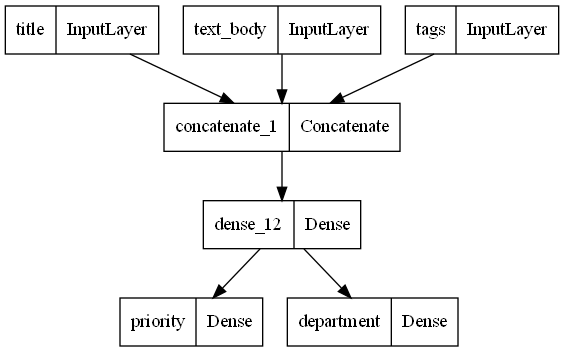

In [22]:
keras.utils.plot_model(model, "ticket_classifier.png")

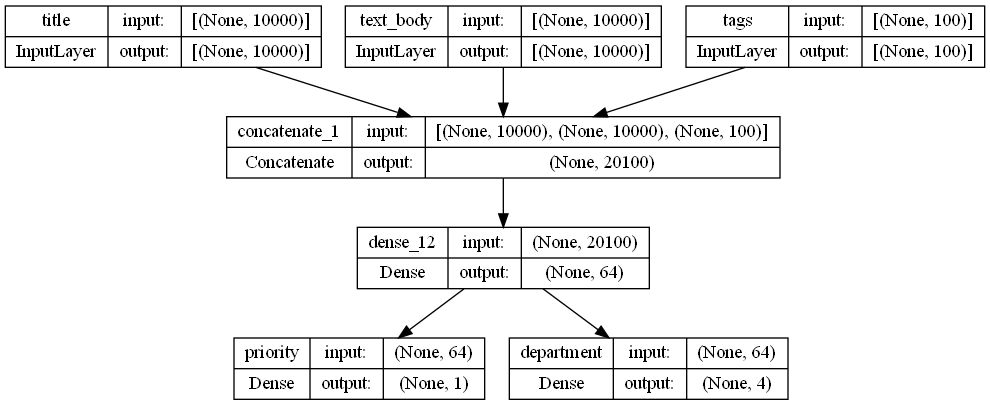

In [23]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

### **<font color="blue">Retrieving the inputs or outputs of a layer in a Functional model</font>**

In [24]:
model.layers

In [25]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [26]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

### **<font color="blue">Creating a new model by reusing intermediate layer outputs</font>**

In [27]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

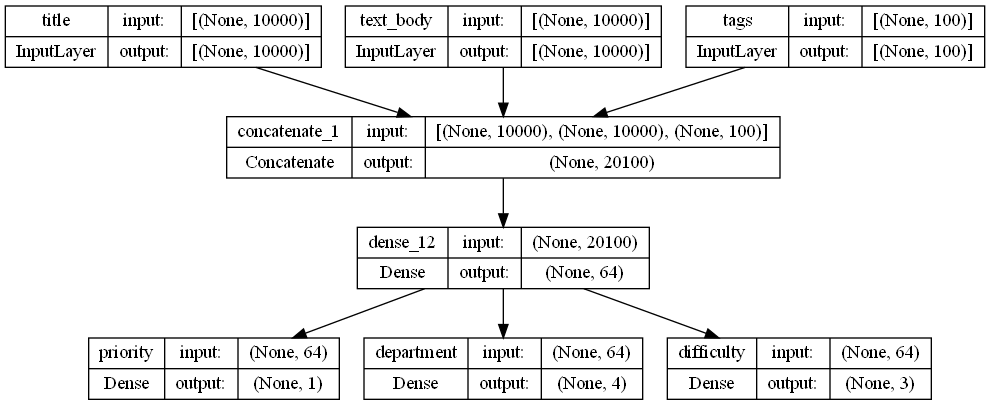

In [28]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

# **<font color="red">Subclassing the Model class</font>**

## **<font color="blue">Rewriting our previous example as a subclassed model</font>**

### **<font color="blue">A simple subclassed model</font>**

In [29]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [30]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [31]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


### Beware: What subclassed models don't support

# **<font color="red">Mixing and matching different components</font>**

### **<font color="blue">Creating a Functional model that includes a subclassed model</font>**

In [32]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

### **<font color="blue">Creating a subclassed model that includes a Functional model</font>**

In [33]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

# **<font color="red">Using built-in training and evaluation loops</font>**

### **<font color="blue">The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`</font>**

In [34]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2963 - accuracy: 0.9119 - val_loss: 0.1431 - val_accuracy: 0.9596
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1660 - accuracy: 0.9535 - val_loss: 0.1238 - val_accuracy: 0.9677
Epoch 3/3
313/313 [==============================] - 0s 1ms/step


# **<font color="red">Writing your own metrics</font>**

### **<font color="blue">Implementing a custom metric by subclassing the `Metric` class</font>**

In [35]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [36]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2924 - accuracy: 0.9134 - rmse: 7.1845 - val_loss: 0.1539 - val_accuracy: 0.9567 - val_rmse: 7.3675
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1651 - accuracy: 0.9537 - rmse: 7.3579 - val_loss: 0.1270 - val_accuracy: 0.9665 - val_rmse: 7.3986
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9728 - rmse: 7.4346


# **<font color="red">Using callbacks</font>**

## **<font color="blue">The EarlyStopping and ModelCheckpoint callbacks</font>**

### **<font color="blue">Using the `callbacks` argument in the `fit()` method</font>**

In [37]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2931 - accuracy: 0.9127 - val_loss: 0.1659 - val_accuracy: 0.9527
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1644 - accuracy: 0.9536 - val_loss: 0.1196 - val_accuracy: 0.9676
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1392 - accuracy: 0.9628 - val_loss: 0.1138 - val_accuracy: 0.9695
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1265 - accuracy: 0.9678 - val_loss: 0.1114 - val_accuracy: 0.9723
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1178 - accuracy: 0.9706 - val_loss: 0.1121 - val_accuracy: 0.9731
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1073 - accuracy: 0.9729 - val_loss: 0.1156 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1068 - accuracy: 0.9751 - val_loss: 0.1091 - val_accuracy:

In [38]:
model = keras.models.load_model("checkpoint_path.keras")

# **<font color="red">Writing your own callbacks</font>**

### **<font color="blue">Creating a custom callback by subclassing the `Callback` class</font>**

In [39]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2926 - accuracy: 0.9141 - val_loss: 0.1544 - val_accuracy: 0.9561
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1666 - accuracy: 0.9532 - val_loss: 0.1254 - val_accuracy: 0.9661
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1384 - accuracy: 0.9627 - val_loss: 0.1153 - val_accuracy: 0.9704
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1281 - accuracy: 0.9668 - val_loss: 0.1229 - val_accuracy: 0.9693
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1153 - accuracy: 0.9709 - val_loss: 0.1165 - val_accuracy: 0.9741
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1107 - accuracy: 0.9724 - val_loss: 0.1154 - val_accuracy: 0.9738
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1063 - accuracy: 0.9750 - val_loss: 0.1107 - val_accuracy:

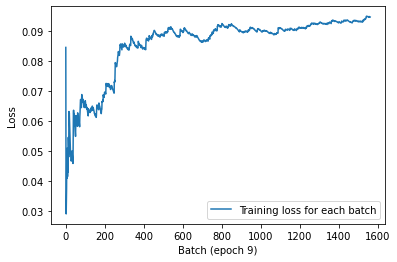

In [40]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

# **<font color="red">Monitoring and visualization with TensorBoard</font>**

In [41]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2949 - accuracy: 0.9122 - val_loss: 0.1471 - val_accuracy: 0.9579
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1660 - accuracy: 0.9537 - val_loss: 0.1266 - val_accuracy: 0.9659
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1362 - accuracy: 0.9639 - val_loss: 0.1194 - val_accuracy: 0.9701
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1253 - accuracy: 0.9677 - val_loss: 0.1128 - val_accuracy: 0.9743
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1176 - accuracy: 0.9708 - val_loss: 0.1067 - val_accuracy: 0.9764
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1074 - accuracy: 0.9729 - val_loss: 0.1114 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1028 - accuracy: 0.9755 - val_loss: 0.1125 - val_accuracy:

In [42]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

Reusing TensorBoard on port 6006 (pid 7852), started 2:19:04 ago. (Use '!kill 7852' to kill it.)

# **<font color="red">Writing your own training and evaluation loops</font>**

## **<font color="blue">Training versus inference</font>**

### **<font color="blue">Low-level usage of metrics</font>**

In [43]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [44]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


# **<font color="red">A complete training and evaluation loop</font>**

### **<font color="blue">Writing a step-by-step training loop: the training step function</font>**

In [45]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

### **<font color="blue">Writing a step-by-step training loop: resetting the metrics</font>**

In [46]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

### **<font color="blue">Writing a step-by-step training loop: the loop itself</font>**

In [47]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9138
...loss: 0.2910
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9534
...loss: 0.1681
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9628
...loss: 0.1410


### **<font color="blue">Writing a step-by-step evaluation loop</font>**

In [48]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1339


# **<font color="red">Make it fast with tf.function</font>**

### **<font color="blue">Adding a `tf.function` decorator to our evaluation-step function</font>**

In [49]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1339


# **<font color="red">Leveraging fit() with a custom training loop</font>**

### **<font color="blue">Implementing a custom training step to use with `fit()`</font>**

In [50]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [51]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2948
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1689
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1419


In [52]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [53]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2971 - sparse_categorical_accuracy: 0.9115
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1679 - sparse_categorical_accuracy: 0.9531
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1417 - sparse_categorical_accuracy: 0.9615
